#Coding Assignment U5A1
ANN Program - Breast Cancer

Author: Rahul Krishnan

Ref: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib

## load file

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/breast_cancer.csv') 

In [3]:
print(dataset.shape)

(569, 32)


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##Understanding the data

In [5]:
print(dataset.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## Selecting class labels, and featureset

In [6]:
y = dataset['diagnosis']
y = y.replace('M', 1)
y = y.replace('B', 0)
X = dataset.drop(['diagnosis','id'], axis = 1)
print(X.head())
print(y.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

## Understanding the dataset

In [7]:
import seaborn as sns

#sns.pairplot(dataset.iloc[:,1:8], hue="diagnosis", corner=True)



## Creating Dummy Classifier



In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape)

strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
  
test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant=1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred))
    test_scores.append(score)

(455, 30) (455,)
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        67
           1       0.51      0.43      0.47        47

    accuracy                           0.60       114
   macro avg       0.58      0.57      0.57       114
weighted avg       0.59      0.60      0.59       114

              precision    recall  f1-score   support

           0       0.45      0.36      0.40        67
           1       0.30      0.38      0.33        47

    accuracy                           0.37       114
   macro avg       0.37      0.37      0.37       114
weighted avg       0.39      0.37      0.37       114

  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [9]:
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

TypeError: ignored

# ANN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim=30, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model



In [11]:
from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60)

model_ann = build_model()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the keras model
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# https://neptune.ai/blog/keras-metrics (about metrics)

# fit the keras model on the dataset
history = model_ann.fit(X_train, y_train, epochs=500, 
                    batch_size=10, validation_split=0.1, callbacks=[es])


Epoch 1/500
41/41 [==============================] - 2s 11ms/step - loss: 0.6451 - accuracy: 0.6186 - val_loss: 0.6114 - val_accuracy: 0.6522
Epoch 2/500
41/41 [==============================] - 0s 4ms/step - loss: 0.6201 - accuracy: 0.6186 - val_loss: 0.5904 - val_accuracy: 0.6522
Epoch 3/500
41/41 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.6186 - val_loss: 0.5733 - val_accuracy: 0.6522
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.6186 - val_loss: 0.5591 - val_accuracy: 0.6522
Epoch 5/500
41/41 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.6186 - val_loss: 0.5371 - val_accuracy: 0.6522
Epoch 6/500
41/41 [==============================] - 0s 4ms/step - loss: 0.5597 - accuracy: 0.7311 - val_loss: 0.5178 - val_accuracy: 0.9565
Epoch 7/500
41/41 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.7213 - val_loss: 0.4966 - val_accuracy: 0.9565
Epoch 8/500


In [13]:
# evaluate the keras model
h, accuracy = model_ann.evaluate(X_test, y_test)
print(h)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 5ms/step - loss: 0.2527 - accuracy: 0.8947
0.2526692748069763
Accuracy: 89.47


# Plot Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


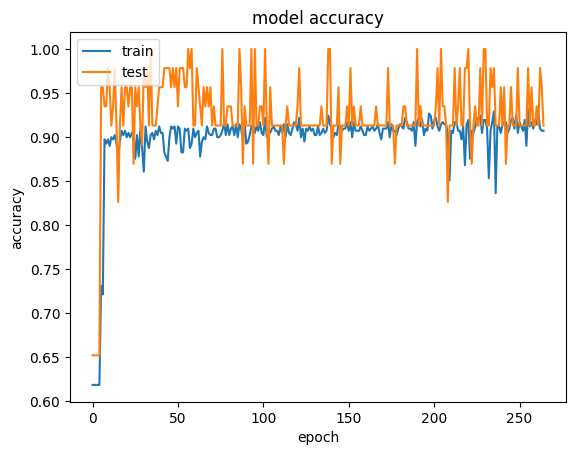

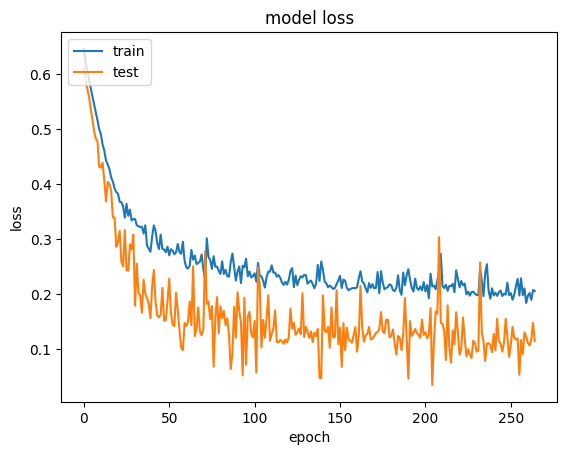

In [14]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluate the performance of our model - Confusion Matrix

In [16]:
# make probability predictions with the model
predictions = model_ann.predict(X_test)
#print(predictions)
# round predictions 
rounded = [round(x[0]) for x in predictions]
#

# make class predictions with the model directly
predictions = model_ann.predict(X_test)

print(predictions)

#print(classification_report(predictions, y_test))

4/4 [==============================] - 0s 3ms/step
[[0.0279355 ]
 [0.98400545]
 [0.17552385]
 [0.02570389]
 [0.02570286]
 [0.9839907 ]
 [0.02604407]
 [0.02570451]
 [0.45008364]
 [0.02571537]
 [0.46571994]
 [0.9840371 ]
 [0.4652519 ]
 [0.02570268]
 [0.02570283]
 [0.04409982]
 [0.02609606]
 [0.46463248]
 [0.9840371 ]
 [0.4656889 ]
 [0.9840371 ]
 [0.9840371 ]
 [0.9840371 ]
 [0.02944138]
 [0.9820046 ]
 [0.02579542]
 [0.46500337]
 [0.02585756]
 [0.02572036]
 [0.02577424]
 [0.02570268]
 [0.0257028 ]
 [0.02570543]
 [0.40596354]
 [0.03449646]
 [0.9840371 ]
 [0.02575716]
 [0.02573335]
 [0.02570268]
 [0.02570389]
 [0.02603877]
 [0.02570337]
 [0.46570304]
 [0.02714812]
 [0.9840371 ]
 [0.02570344]
 [0.0257098 ]
 [0.02573751]
 [0.0257033 ]
 [0.9840371 ]
 [0.41351992]
 [0.9840371 ]
 [0.4656912 ]
 [0.02573295]
 [0.9840371 ]
 [0.9840371 ]
 [0.40046003]
 [0.02570294]
 [0.96566594]
 [0.02570286]
 [0.02606212]
 [0.9840371 ]
 [0.02634182]
 [0.02570276]
 [0.02570277]
 [0.46570107]
 [0.02570295]
 [0.9840371

# Saving the model

In [18]:
# save model and architecture to single file
model_ann.save("model.h5")
print("Saved model to disk")

Saved model to disk


# Load the model and predict on new data

In [19]:
from keras.models import load_model
 
# load dataset 
dataset_new = pd.read_csv('/content/breast_cancer_randomized_no_label.csv')
print(dataset_new.info())

# split into input (X) and output (Y) variables
X = dataset_new.drop(['id'], axis=1)

print(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [21]:
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

# Predict the outcomes
predictions_new = np.argmax(model.predict(X),axis=1)
patient_report = pd.DataFrame([dataset_new.id, predictions_new.flatten()], index=['id','diagnosis'])
print(patient_report.transpose())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________
18/18 [==============================] - 0s 2ms/step
           id  diagnosis
0       89813          0
1      873843          0
2    90602302          0
3    84667401          0
4      907367          0
..        ...        ...
564    903811          0
565  91544001          0
566    894090          0
567   8710441      